實作說明：
嘗試至少以下述方式之一(或用其他方式)提高正確率，以Matplotlib loss/accuracy 圖示之 

Dropout Rate(目前 0.2)

Batch Normalization (API?)

Kernel Size (目前 3 x 3)

Activation Function (目前 Relu)

Optimization: (目前 adam)

In [2]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
# 更多輸入

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
# 載入影像
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
# (28x28)乃 2D!
# convolution 需要 height x width x color 我們得 expand_dims
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
# 共有多少種物品
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
# 使用 函數式接口 functional API 建模
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# your improved model code here to replace the above one

In [8]:
# 編譯與訓練
# 請確認用GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 42s 6ms/step - loss: 0.5171 - accuracy: 0.8075 - val_loss: 0.4066 - val_accuracy: 0.8521
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3607 - accuracy: 0.8632 - val_loss: 0.3472 - val_accuracy: 0.8663
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3151 - accuracy: 0.8806 - val_loss: 0.3387 - val_accuracy: 0.8765
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2822 - accuracy: 0.8944 - val_loss: 0.2897 - val_accuracy: 0.8918
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2556 - accuracy: 0.9026 - val_loss: 0.3017 - val_accuracy: 0.8924
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2383 - accuracy: 0.9097 - val_loss: 0.3053 - val_accuracy: 0.8887
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2163 - accuracy: 0.9182 - val_loss: 0.2942 - val_ac

In [ ]:
#your improved optimization code here to replace the above one

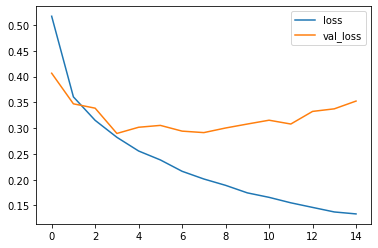

In [9]:
# 繪出迭代損失
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

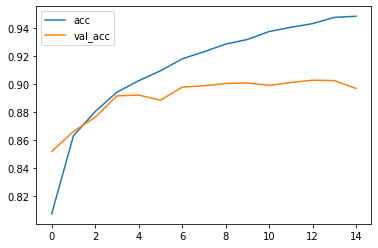

In [10]:
# 繪出迭代精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[851   3  30  34   4   1  72   0   5   0]
 [  2 979   2  13   2   0   1   0   1   0]
 [ 15   0 856  13  70   0  45   0   1   0]
 [  6   8  17 924  29   0  15   0   1   0]
 [  0   1  40  23 885   0  50   0   1   0]
 [  0   0   0   2   0 965   0  18   0  15]
 [125   1  79  36 130   1 619   0   8   1]
 [  0   0   0   0   0  10   0 957   1  32]
 [  1   0   7   3   9   3   7   2 967   1]
 [  1   0   0   0   0   5   0  26   0 968]]


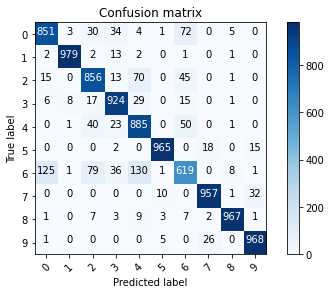

In [11]:
# 繪出混淆矩陣
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [12]:
# 映射標籤
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

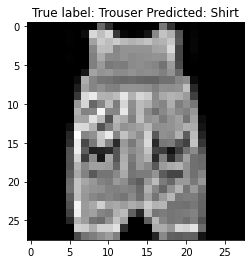

In [ ]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));